# Correlation Heatmap

<a href="https://colab.research.google.com/github/andrewm4894/netdata-community/blob/netdata-pandas-example/netdata-agent-api/netdata-pandas/correlation_heatmap.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will use the [netdata-pandas](https://github.com/netdata/netdata-pandas) Python package to pull some data from some demo Netdata servers and make some pretty looking correlation heatmaps, because we all love a good heatmap don't we. 

**Note**: you can click the "Open in Colab" button above to open this notebook in [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true) where you can just get going with it without having to set up python enviornments or any messy stuff like that.

In [1]:
# if you need to, uncomment below to install netdata-pandas and seaborn packages
#!pip install seaborn==0.11.0 netdata-pandas==0.0.27

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from netdata_pandas.data import get_data

Lets pull the data from three demo nodes for a subset of charts for the last 15 minutes.

In [3]:
# inputs
hosts = ['london.my-netdata.io', 'cdn77.my-netdata.io', 'octopuscs.my-netdata.io']
charts = ['system.cpu', 'system.load', 'system.io', 'system.ram', 'system.net', 'system.ip', 'system.processes', 'system.intr', 'system.softnet_stat']
before = 0
after = -60*15

In [4]:
# get the data
df = get_data(hosts=hosts, charts=charts, after=after, before=before)
print(df.shape)
df.head()

(2700, 30)


system.cpu|guest  system.cpu|guest_nice  \
host                time_idx                                              
cdn77.my-netdata.io 1603460665               0.0                    0.0   
                    1603460666               0.0                    0.0   
                    1603460667               0.0                    0.0   
                    1603460668               0.0                    0.0   
                    1603460669               0.0                    0.0   

                                system.cpu|iowait  system.cpu|irq  \
host                time_idx                                        
cdn77.my-netdata.io 1603460665           32.82828             0.0   
                    1603460666            0.00000             0.0   
                    1603460667            0.00000             0.0   
                    1603460668            0.00000             0.0   
                    1603460669            0.00000             0.0   

                                system.cpu|nice  system.cpu|softirq  \
host                time_idx                                          
cdn77.my-netdata.io 1603460665              0.0                 0.0   
                    1603460666              0.0                 0.0   
                    1603460667              0.0                 0.0   
                    1603460668              0.0                 0.0   
                    1603460669              0.0                 0.0   

                                system.cpu|steal  system.cpu|system  \
host                time_idx                                          
cdn77.my-netdata.io 1603460665               0.0           2.020202   
                    1603460666               0.0           1.507538   
                    1603460667               0.0           1.515151   
                    1603460668               0.0           1.015228   
                    1603460669               0.0           2.000000   

                                system.cpu|user  system.intr|interrupts  ...  \
host                time_idx                                             ...   
cdn77.my-netdata.io 1603460665         0.505050                339.1384  ...   
                    1603460666         2.010050                366.6814  ...   
                    1603460667         0.505050                334.6279  ...   
                    1603460668         0.507614                307.5347  ...   
                    1603460669         1.000000                324.9979  ...   

                                system.processes|running  system.ram|buffers  \
host                time_idx                                                   
cdn77.my-netdata.io 1603460665                       2.0            244.9961   
                    1603460666                       4.0            244.9961   
                    1603460667                       1.0            244.9961   
                    1603460668                       1.0            244.9961   
                    1603460669                       4.0            244.9961   

                                system.ram|cached  system.ram|free  \
host                time_idx                                         
cdn77.my-netdata.io 1603460665           2650.066         392.9688   
                    1603460666           2650.066         389.1836   
                    1603460667           2650.070         389.2617   
                    1603460668           2650.070         389.2305   
                    1603460669           2650.066         388.8750   

                                system.ram|used  system.softnet_stat|dropped  \
host                time_idx                                                   
cdn77.my-netdata.io 1603460665         677.4180                          0.0   
                    1603460666         681.2031                          0.0   
                    1603460667         681.1211                          0.0   
             

## Heatmaps!

Lets just loop over our dataframe for each host and make our heatmap.

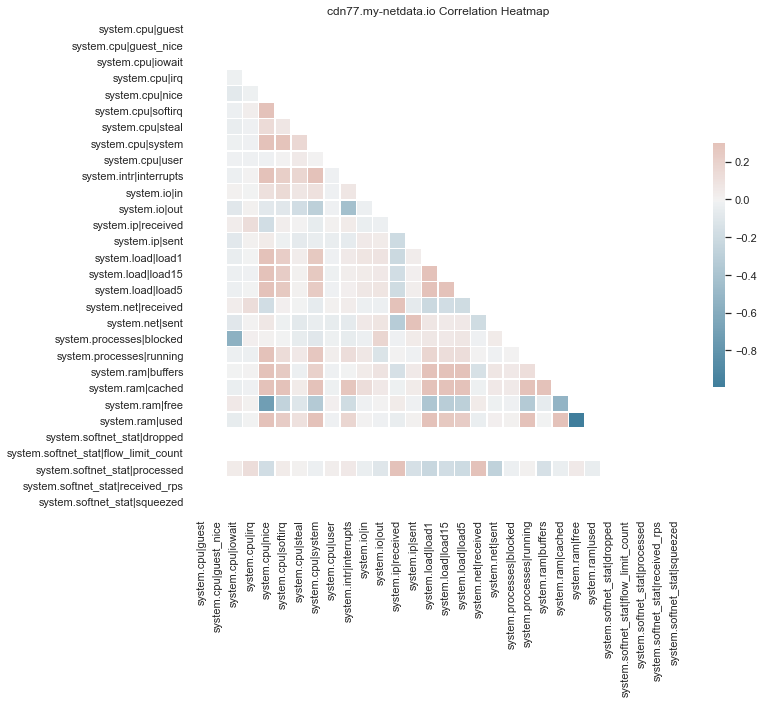

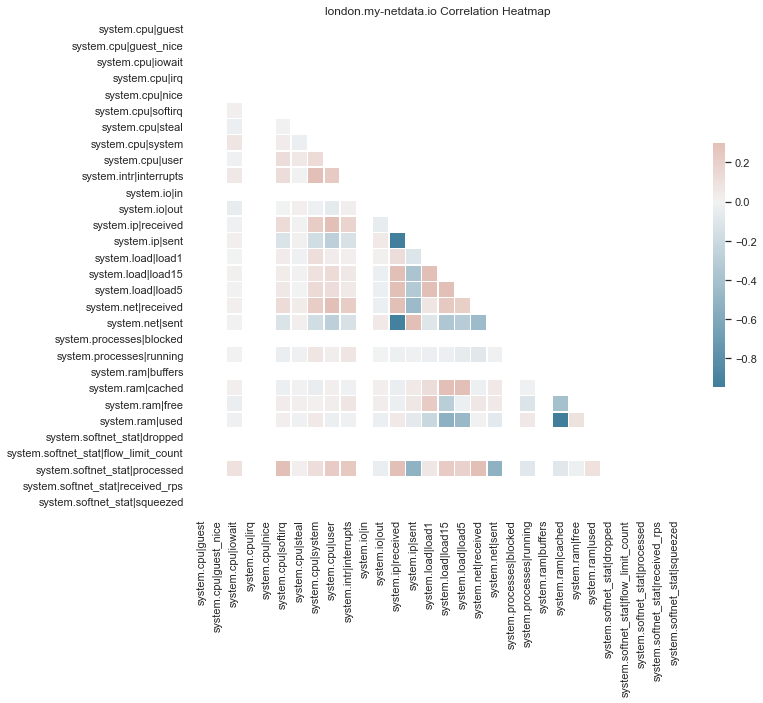

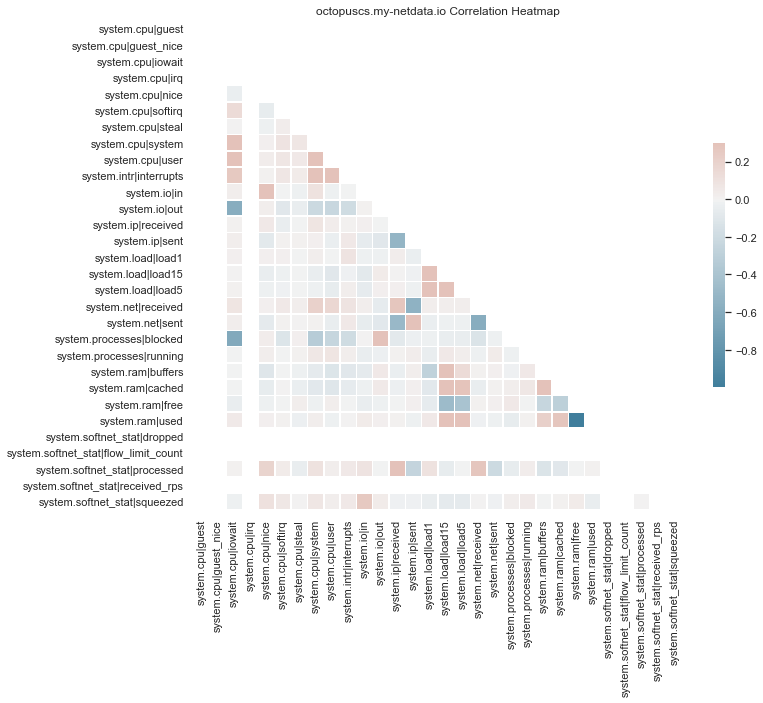

In [5]:
# set some plotting options
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

for host in df.index.unique(0):    
    corr = df.loc[host].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(
        corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
        square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title(f'{host} Correlation Heatmap')